In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_x = np.array([0, 1, 2, 3, 4])
data_y = np.array([1, 4, 7, 10, 13])

In [3]:
def forward(x, w, b):
    return x * w + b
def loss(y_pred, y):
    return (y_pred - y) ** 2

In [4]:
min_mse = float('inf')
best_w = None
best_b = None

In [5]:
# 穷举
w_range = np.arange(0.0, 4.1, 0.1)
b_range = np.arange(0.0, 2.1, 0.1)

In [6]:
w_list = []
b_list = []
mse_list = []

np.mean 是 NumPy 库中的一个函数，用于计算输入数组或数据的均值。

它会将数组中的所有元素加总起来，然后除以元素的个数，从而得到平均值。

In [7]:
for w in w_range:
    for b in b_range:
        y_pred = forward(data_x, w, b)
        print(loss(y_pred, data_y))
        mse = np.mean(loss(y_pred, data_y))  #计算mse
        if mse < min_mse:
            min_mse = mse
            best_w = w
            best_b = b
        w_list.append(w)
        b_list.append(b)
        mse_list.append(mse)

[  1.  16.  49. 100. 169.]
[  0.81  15.21  47.61  98.01 166.41]
[  0.64  14.44  46.24  96.04 163.84]
[  0.49  13.69  44.89  94.09 161.29]
[  0.36  12.96  43.56  92.16 158.76]
[  0.25  12.25  42.25  90.25 156.25]
[  0.16  11.56  40.96  88.36 153.76]
[9.0000e-02 1.0890e+01 3.9690e+01 8.6490e+01 1.5129e+02]
[4.0000e-02 1.0240e+01 3.8440e+01 8.4640e+01 1.4884e+02]
[1.0000e-02 9.6100e+00 3.7210e+01 8.2810e+01 1.4641e+02]
[  0.   9.  36.  81. 144.]
[1.0000e-02 8.4100e+00 3.4810e+01 7.9210e+01 1.4161e+02]
[4.0000e-02 7.8400e+00 3.3640e+01 7.7440e+01 1.3924e+02]
[9.0000e-02 7.2900e+00 3.2490e+01 7.5690e+01 1.3689e+02]
[  0.16   6.76  31.36  73.96 134.56]
[  0.25   6.25  30.25  72.25 132.25]
[  0.36   5.76  29.16  70.56 129.96]
[  0.49   5.29  28.09  68.89 127.69]
[  0.64   4.84  27.04  67.24 125.44]
[  0.81   4.41  26.01  65.61 123.21]
[  1.   4.  25.  64. 121.]
[  1.    15.21  46.24  94.09 158.76]
[  0.81  14.44  44.89  92.16 156.25]
[  0.64  13.69  43.56  90.25 153.76]
[  0.49  12.96  42.25 

In [8]:
print(f"最小均方误差 (MSE): {min_mse}")
print(f"对应的权重 w: {best_w}")
print(f"对应的偏置 b: {best_b}")

最小均方误差 (MSE): 0.0
对应的权重 w: 3.0
对应的偏置 b: 1.0


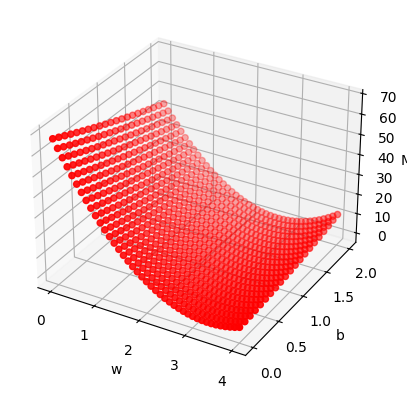

In [9]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(w_list, b_list, mse_list, c='r', marker='o')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('MSE')
plt.show()

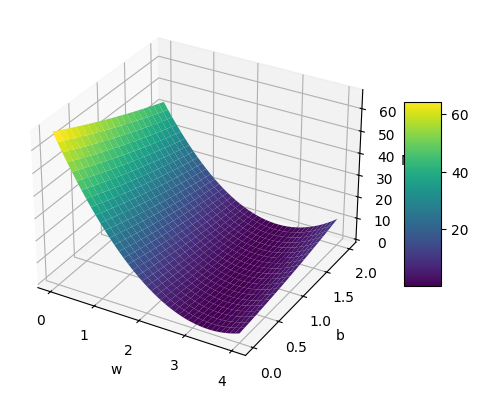

In [10]:
W, B = np.meshgrid(w_range, b_range)
MSE = np.zeros_like(W) #创建一个和 W 一样但是元素都是 0 的数组

# 计算每个网格点的MSE
for i, w in enumerate(w_range):
    for j, b in enumerate(b_range):
        y_pred = forward(data_x, w, b)
        MSE[j, i] = np.mean(loss(y_pred, data_y))

# 绘制曲面图
fig2 = plt.figure()
ax1 = fig2.add_subplot(projection='3d')
surf = ax1.plot_surface(W, B, MSE, cmap='viridis')
fig2.colorbar(surf, shrink=0.5, aspect=5)
ax1.set_xlabel('w')
ax1.set_ylabel('b')
ax1.set_zlabel('MSE')
plt.show()